## UBER DEMAND ANALYSIS



***I am temitope olanipekun samson the science maniac(Machine learning engineer) & (Data analyst)***

***i will be doing a concrete analysis on the (UBER SUPPLY AND DEMAND GAP)***

We may have some experience of travelling to and from the airport. We have used Uber or any other cab service for this travel? Did you at any time face the problem of cancellation by the driver or non-availability of cars?

Well, if these are the problems faced by customers, these very issues also impact the business of Uber. If drivers cancel the request of riders or if cars are unavailable, Uber loses out on its revenue. Let’s hear more about such problems that Uber faces during its operations.

## Dataset in Details

There are six attributes associated with each request made by a customer:

Request id: A unique identifier of the request

Time of request: The date and time at which the customer made the trip request

Drop-off time: The drop-off date and time, in case the trip was completed

Pick-up point: The point from which the request was made

Driver id: The unique identification number of the driver

Status of the request: The final status of the trip, that can be either completed, cancelled by the driver or no cars available

Note: For this case study, only the trips to and from the airport are being considered

# AIM

The aim of analysis is to identify the root cause of the problem (i.e. cancellation and non-availability of cars) and recommend ways to improve the situation. As a result of your analysis, we will be able to present to the client the root cause(s) and possible hypotheses of the problem(s) and recommend ways to improve them. .

## Import the neccesary libraries

In [40]:
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

## Reading in the dataset

In [37]:
df = pd.read_csv("UBER ANALYSIS BASED ON DEMAND.csv")
df.head(9)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51


So to get informations of our dataset is also important,so i also made sure i used the function to find that out

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


## Cleaning the data properly and do proper imuting

In [41]:
# Cleaning and imuting data
# Check for expected datetime columns, in this case; 'Request timestamp', 'Drop timestamp'
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'])
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'])

# dropping the duplicates -- though no duplicates present
df = df.drop_duplicates()

# Getting only the time Of Day of Pickup Point to view the frequency throughout the day
df['Request timeOfDay'] = df['Request timestamp'].dt.time
df['Request Date'] = df['Request timestamp'].dt.date

df['Request wkOfDay'] = df['Request timestamp'].dt.date.apply(lambda x: calendar.day_name[x.weekday()])

df['No of Requests'] = 1
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request timeOfDay,Request Date,Request wkOfDay,No of Requests
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11:51:00,2016-11-07,Monday,1
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17:57:00,2016-11-07,Monday,1
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,09:17:00,2016-12-07,Wednesday,1
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21:08:00,2016-12-07,Wednesday,1
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,08:33:16,2016-07-13,Wednesday,1


Getting the total number of cars avaliable,the number of trips completed and also the trips cancelled

In [42]:
dfTotal = df.groupby(by = ['Status'])['Request id'].count().reset_index()
dfTotal.head()

,Status,Request id
0,Cancelled,1264
1,No Cars Available,2650
2,Trip Completed,2831


## Analysing supply demand gap over a given date

Text(0.5, 1.0, 'Avg Uber Supply Demand Analysis per given date')

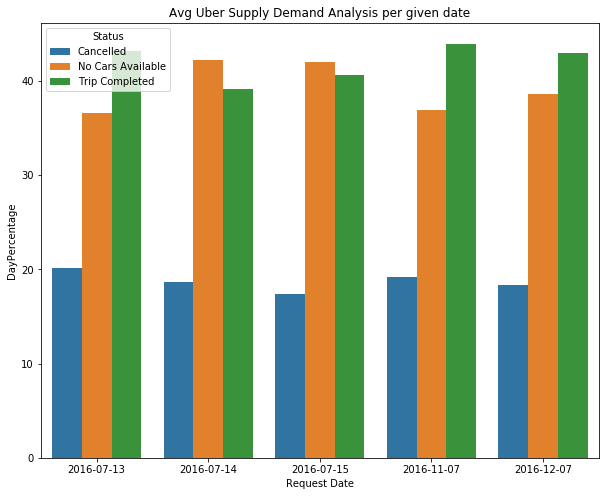

In [43]:
dfGrp = df.groupby(by = ['Request Date', 'Status'])['No of Requests'].count().reset_index()
dfGrp

reqPrcntageList = list()
for x in dfGrp.index:
    #reqPrcntageList.append(sum(dfGrp['No of Requests'].loc[dfGrp['Request Date'] == dfGrp.loc[x, 'Request Date']]))
    reqPrcntageList.append(round(dfGrp.loc[x, 'No of Requests'] * 100 /  sum(dfGrp['No of Requests'].loc[dfGrp['Request Date'] == dfGrp.loc[x, 'Request Date']]), 2))

dfGrp['DayPercentage'] = reqPrcntageList
dfGrp

plt.figure(figsize=(10,8))
sns.barplot(x = 'Request Date', y = 'DayPercentage', hue = 'Status', data = dfGrp)
plt.title('Avg Uber Supply Demand Analysis per given date')

## Analysing the demand supply gap over the week

Text(0.5, 1.0, 'Average Uber Supply Demand Analysis per the day of Week')

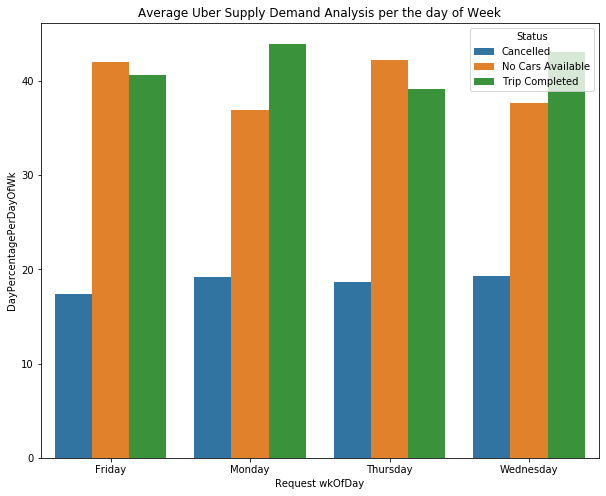

In [44]:
dfGrp = df.groupby(by = ['Request wkOfDay', 'Status'])['No of Requests'].count().reset_index()


reqPrcntageList = list()
for x in dfGrp.index:
    #reqPrcntageList.append(sum(dfGrp['No of Requests'].loc[dfGrp['Request Date'] == dfGrp.loc[x, 'Request Date']]))
    reqPrcntageList.append(round(dfGrp.loc[x, 'No of Requests'] * 100 /  sum(dfGrp['No of Requests'].loc[dfGrp['Request wkOfDay'] == dfGrp.loc[x, 'Request wkOfDay']]), 2))

dfGrp['DayPercentagePerDayOfWk'] = reqPrcntageList
plt.figure(figsize=(10,8))
sns.barplot(x = 'Request wkOfDay', y = 'DayPercentagePerDayOfWk', hue = 'Status', data = dfGrp)
plt.title('Average Uber Supply Demand Analysis per the day of Week')

## Observations from the above plot:
### In overall,
#### Point 1: Thursday and Friday having most cars unavailability
#### Point 2: Monday and Wednesdays serving most number of successful trip
#### Point 3: Of all days, Cancellation are steady at below 20%

# Analysing Demand Supply Gap over the day of week - From Airport to City

## Analysing Cars availability from Airport to City and City to Airport  prespective..

Text(0, 0.5, 'Avg calcuations per day')

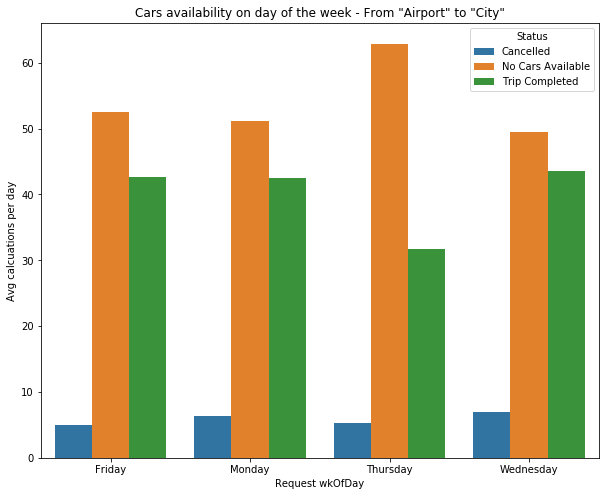

In [45]:
# Analysing Cars availability from 'Airport To City' and 'City To Airport' prespective.

dfGrp = df.groupby(by = ['Request wkOfDay', 'Status', 'Pickup point'])['No of Requests'].count().reset_index()
dfGrpAirport = dfGrp.loc[dfGrp['Pickup point'] == 'Airport'].reset_index()

reqPrcntageList = list()
for x in dfGrpAirport.index:
    #reqPrcntageList.append(sum(dfGrp['No of Requests'].loc[dfGrp['Request Date'] == dfGrp.loc[x, 'Request Date']]))
    reqPrcntageList.append(round(dfGrpAirport.loc[x, 'No of Requests'] * 100 /  sum(dfGrpAirport['No of Requests'].loc[dfGrpAirport['Request wkOfDay'] == dfGrpAirport.loc[x, 'Request wkOfDay']]), 2))

dfGrpAirport['DayPercentage'] = reqPrcntageList
dfGrpAirport

plt.figure(figsize=(10,8))
sns.barplot(x = 'Request wkOfDay', y = 'DayPercentage', hue = 'Status', data = dfGrpAirport)
plt.title('Cars availability on day of the week - From "Airport" to "City"')
plt.ylabel('Avg calcuations per day')

## Observations from above plot:
### Observations:
#### 1. Cancellations at Airport is much less compared to City
#### 2. Usually Thursdays at airport having more cars unavailability and less successful trips compared to other days
#### 3.Friday has more cars available but still has same number of trips completed with monday and wednesday

 ## QUESTION TO ASK
 ***Why is that happenning on friday,having more cars and still having the sane number of trips completed compared to***
  ***to days like mondays and wednesdays who have  slightly less cars and still complete the same number of trips***
  

# Analysing Demand Supply Gap over the day of week - From City to Airport

Text(0, 0.5, 'Avg calcuations per day')

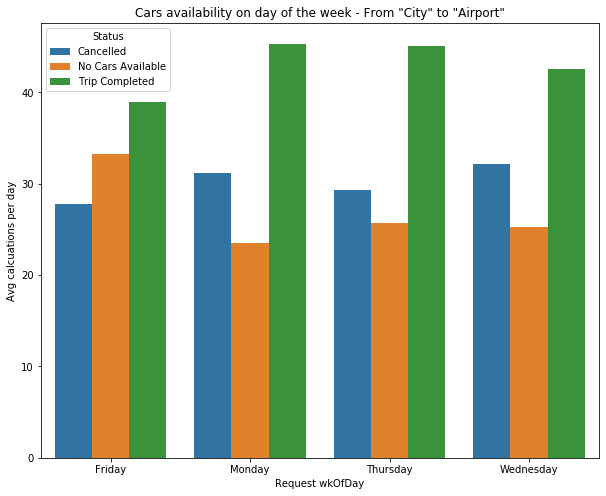

In [46]:
dfGrp = df.groupby(by = ['Request wkOfDay', 'Status', 'Pickup point'])['No of Requests'].count().reset_index()
dfGrpCity = dfGrp.loc[dfGrp['Pickup point'] == 'City'].reset_index()

reqPrcntageList = list()
for x in dfGrpCity.index:
    reqPrcntageList.append(round(dfGrpCity.loc[x, 'No of Requests'] * 100 /  sum(dfGrpCity['No of Requests'].loc[dfGrpCity['Request wkOfDay'] == dfGrpCity.loc[x, 'Request wkOfDay']]), 2))

dfGrpCity['DayPercentage'] = reqPrcntageList
dfGrpCity

plt.figure(figsize=(10,8))
sns.barplot(x = 'Request wkOfDay', y = 'DayPercentage', hue = 'Status', data = dfGrpCity)
plt.title('Cars availability on day of the week - From "City" to "Airport"')
plt.ylabel('Avg calcuations per day')


### Observations:
#### 1. Usually successful trips are more from City to Airport; compared to Airport to City
##### 1. Question to Ask: Why cars are returning empty
### 2. Cancellations to go to the airport are more; compared to no cars availability
### 3. Monday being the huge money maker from City to Airport

# Analysing typical cars supply demand stats throughout the day

Text(0, 0.5, 'Total number of orders')

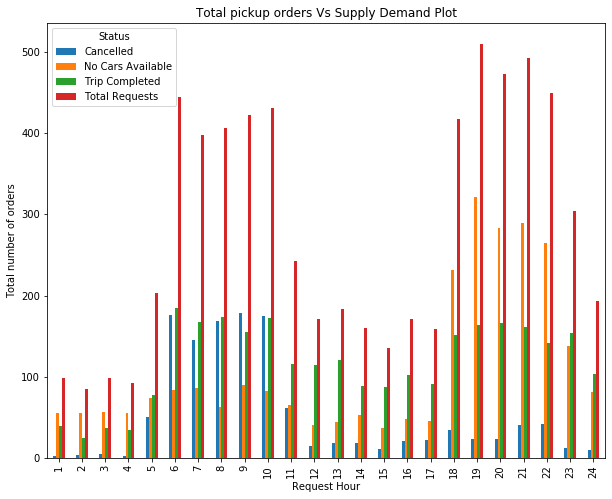

In [47]:
df['Request Hour'] = df['Request timestamp'].dt.hour + 1
dfGrp = df.groupby(by = ['Status', 'Request Hour'])['No of Requests'].count().unstack()

dfGrp = dfGrp.T
dfGrp['Total Requests'] = dfGrp['Cancelled'] + dfGrp['No Cars Available'] + dfGrp['Trip Completed']
dfGrp.plot(kind = 'bar', figsize=(10,8))
plt.title('Total pickup orders Vs Supply Demand Plot')
plt.ylabel('Total number of orders')

Text(0.5, 1.0, 'Exact Supply Demand Gap')

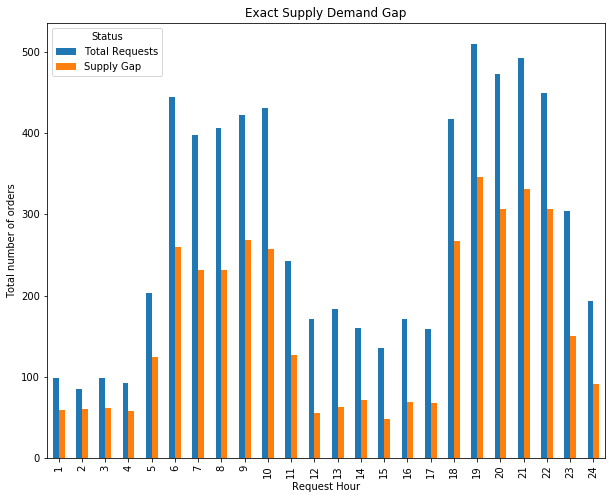

In [48]:
dfGrp['Supply Gap'] = dfGrp['Total Requests'] - dfGrp['Trip Completed']
dfGrpSubSet = dfGrp.loc[:, ['Total Requests', 'Supply Gap']]
dfGrpSubSet.plot(kind = 'bar', figsize=(10,8))
plt.ylabel('Total number of orders')
plt.title('Exact Supply Demand Gap')

## Insights:
### Observations:
#### 1. Most number of Pickup orders are received from 4AM onwards till 11AM; and then 5AM onwards till 11PM
#### 2. In morning high peak time slot, we have more number of Cancellations and have same level number of Successful Trips too.
#### 3. Whereas in evening high peak time slot, we have more cars unavailability whereas Successful trips are being maintained at steady level throughout the hours of day

# Analysing typical Supply Demand plot for the course of day from/to Airport/City
## ============== FROM AIRPORT TO CITY ==============

In this analysis every single hour is accounted for........................

you can taake a good look at the pickup point,Status, Request Hour, and NO of requests.....

In [49]:
dfGrp1 = df.groupby(by = ['Pickup point', 'Status', 'Request Hour'])['No of Requests'].count().unstack()
dfGrp1 = dfGrp1.fillna(0)
dfGrp1

Request Hour                      1     2     3     4     5      6      7   \
Pickup point Status                                                          
Airport      Cancelled           0.0   0.0   0.0   0.0   2.0    4.0    4.0   
             No Cars Available  30.0  29.0  25.0  30.0  34.0    3.0    4.0   
             Trip Completed     23.0  13.0  16.0  15.0  36.0   85.0   81.0   
City         Cancelled           3.0   4.0   5.0   2.0  49.0  172.0  141.0   
             No Cars Available  26.0  27.0  32.0  26.0  40.0   81.0   82.0   
             Trip Completed     17.0  12.0  21.0  19.0  42.0  100.0   86.0   

Request Hour                       8      9      10  ...    15    16    17  \
Pickup point Status                                  ...                     
Airport      Cancelled            5.0    2.0    8.0  ...   6.0  11.0  14.0   
             No Cars Available    3.0    4.0    7.0  ...   7.0  13.0   9.0   
             Trip Completed      75.0   67.0   74.0  ...  37.0  52.0  38.0   
City         Cancelled          164.0  176.0  167.0  ...   5.0  10.0   8.0   
             No Cars Available   60.0   86.0   76.0  ...  30.0  35.0  37.0   
             Trip Completed      99.0   88.0   99.0  ...  51.0  50.0  53.0   

Request Hour                       18     19     20     21     22     23    24  
Pickup point Status                                                             
Airport      Cancelled           19.0   15.0   15.0   29.0   28.0    3.0   0.0  
             No Cars Available  215.0  309.0  268.0  275.0  254.0  100.0  36.0  
             Trip Completed      74.0   81.0   83.0   74.0   61.0   80.0  62.0  
City         Cancelled           16.0    9.0    9.0   12.0   14.0    9.0  10.0  
             No Cars Available   17.0   13.0   15.0   15.0   11.0   38.0  45.0  
             Trip Completed      77.0   83.0   83.0   87.0   81.0   74.0  41.0  

[6 rows x 24 columns]

Text(0.5, 1.0, 'Supply Demand plot for the day at Airport')

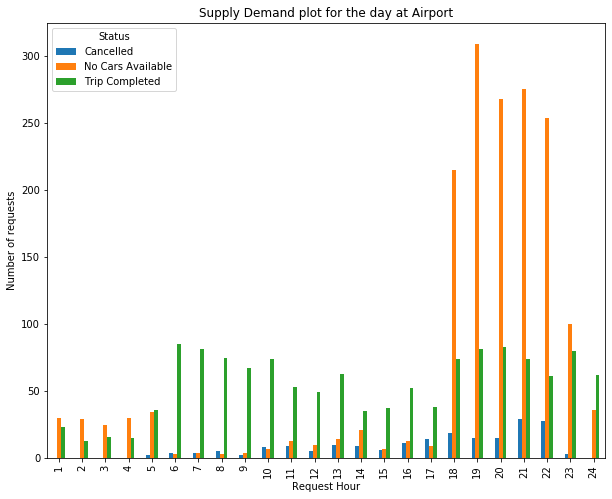

In [50]:
dfGrp1.loc['Airport'].T.plot(kind = 'bar', figsize = (10,8))
plt.ylabel('Number of requests')
plt.title('Supply Demand plot for the day at Airport')

Text(0, 0.5, 'Total number of requests')

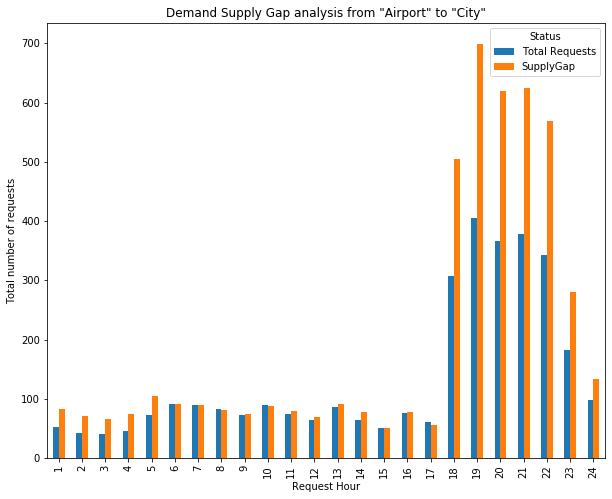

In [51]:
dfGrpAirport = dfGrp1.loc['Airport'].T

dfGrpAirport['Total Requests'] = dfGrpAirport['Cancelled'] +  dfGrpAirport['No Cars Available'] + dfGrpAirport['Trip Completed']
dfGrpAirport['SupplyGap'] = dfGrpAirport['Total Requests'] - dfGrpAirport['Cancelled'] +  dfGrpAirport['No Cars Available']
dfGrpAirport.head()

dfGrpAirport.loc[:, ['Total Requests', 'SupplyGap']].plot(kind = 'bar', figsize=(10,8))
plt.title('Demand Supply Gap analysis from "Airport" to "City"')
plt.ylabel('Total number of requests')

Text(0.5, 1.0, 'Supply Demand plot for the day at City')

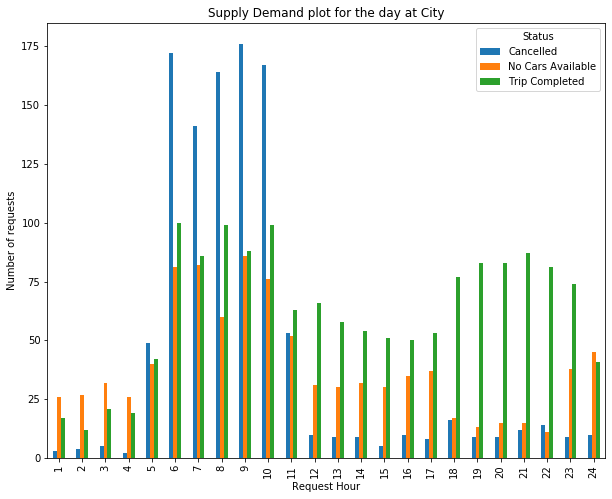

In [52]:
dfGrp1.loc['City'].T.plot(kind = 'bar', figsize=(10,8))
plt.ylabel('Number of requests')
plt.title('Supply Demand plot for the day at City')

Text(0, 0.5, 'Total number of requests')

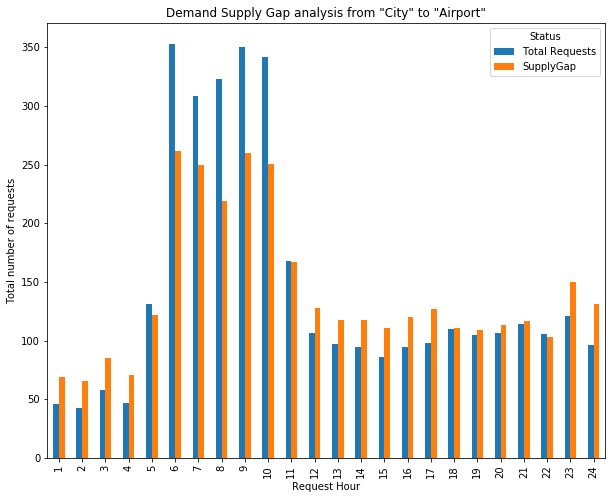

In [53]:
dfGrpCity = dfGrp1.loc['City'].T

dfGrpCity['Total Requests'] = dfGrpCity['Cancelled'] +  dfGrpCity['No Cars Available'] + dfGrpCity['Trip Completed']
dfGrpCity['SupplyGap'] = dfGrpCity['Total Requests'] - dfGrpCity['Cancelled'] +  dfGrpCity['No Cars Available']
dfGrpCity.head()

dfGrpCity.loc[:, ['Total Requests', 'SupplyGap']].plot(kind = 'bar', figsize=(10,8))
plt.title('Demand Supply Gap analysis from "City" to "Airport"')
plt.ylabel('Total number of requests')

Let make dig out some facts for you to dwell with and its based on the supply and demand gap

***Correlating these two visualizations,(demand supply gap from airport to city and demand supply gap from city to***

***airport) a possible hypothesis could be***:

The demand during morning and afternoon hours from the Airport to City is quite low, which means that a driver who

completed a City to Airport route in the morning hours may have to wait a really long time to get a ride back to

the City, or he may have to come back without a passenger. Both situations are not idle for drivers, which might be

the reason for highest number of "Cancelled" trips in the City to Airport trip in the morning hours or

we can say these is a result of maybe slow response based on the fact that most customers want to get to their

required location very fast....and would cancle because the uber drivers didnt get to them in time and so they

settled for an alternative..

The vice versa happens in evening when there are too many flight coming in to the airport and hence there is a high

demand for cabs and not enough supply. which is why most number of "No Cars Available" were observed in Evening in

the Airport to City route.

I am sure we should be able  to understand that am trying to talk from the both perspective of the  drivers and the

passengers though....

 ## So here are the possible solutions
Possible Solution:

Give incentives/surge pricing/bonus for trips from City to Airport during Morning hours.

Give incentives/surge pricing/bonus for trips from Airport to City during Evening hours.

Drivers can find alternatives routes when making their movements to avoid traffic incase they need to meet up with

a passenger

Uber can give Gas expense to drivers when they return from Airport without a ride or go to airpot for pick up 

without a ride.

Uber can increase market share by marketing campaigns and offers to customers when demand is low.


Like i said possible solutions :::TAKE NOTE OF THAT:::

I hope i ahev being able to give you some insights  as regards this data.....

pls do well to comment if you can and most defintely gain something from this .....

I AM TEMITOPE OLANIPEKUN SAMSON (DATA SCIENCE MANIAC) {MACHINE LEARNING ENGINEER AND DATA ANALYST)